In [204]:
import pandas as pd
import torch
import numpy as np

import plotly
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [205]:
df = pd.read_csv('./data/root_cause_analysis.csv')
df

,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY
1,2,0,0,0,0,0,0,1,MEMORY
2,3,0,1,1,0,0,1,1,MEMORY
3,4,0,1,0,1,1,0,1,MEMORY
4,5,1,1,0,1,0,1,0,NETWORK_DELAY
...,...,...,...,...,...,...,...,...,...
995,996,0,0,0,0,0,0,1,DATABASE_ISSUE
996,997,0,0,0,1,0,0,0,NETWORK_DELAY
997,998,1,1,1,0,0,0,0,MEMORY
998,999,0,1,1,1,1,0,0,NETWORK_DELAY


In [206]:
df.isna().sum()

ID             0
CPU_LOAD       0
MEMORY_LOAD    0
DELAY          0
ERROR_1000     0
ERROR_1001     0
ERROR_1002     0
ERROR_1003     0
ROOT_CAUSE     0
dtype: int64

In [207]:
df.dtypes

ID              int64
CPU_LOAD        int64
MEMORY_LOAD     int64
DELAY           int64
ERROR_1000      int64
ERROR_1001      int64
ERROR_1002      int64
ERROR_1003      int64
ROOT_CAUSE     object
dtype: object

In [208]:
df['ROOT_CAUSE'].unique()

array(['MEMORY', 'NETWORK_DELAY', 'DATABASE_ISSUE'], dtype=object)

In [209]:
# df['ROOT_CAUSE'] = df['ROOT_CAUSE'].replace({'MEMORY': 1, 'NETWORK_DELAY': 2, 'DATABASE_ISSUE': 3})

In [210]:
df.dtypes

ID              int64
CPU_LOAD        int64
MEMORY_LOAD     int64
DELAY           int64
ERROR_1000      int64
ERROR_1001      int64
ERROR_1002      int64
ERROR_1003      int64
ROOT_CAUSE     object
dtype: object

In [211]:
# data = torch.tensor(df.values)
# data

In [212]:
data = pd.read_csv('data/root_cause_analysis.csv')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['ROOT_CAUSE'] = le.fit_transform(data['ROOT_CAUSE'])

# data['ROOT_CAUSE'] = data['ROOT_CAUSE'].replace({'MEMORY': 1, 'NETWORK_DELAY': 2, 'DATABASE_ISSUE': 3})
# data = data.drop(columns=['ROOT_CAUSE'])
x = torch.tensor(data.iloc[:, 1:8].values).float()
y = torch.tensor(data.iloc[:, 8].values).float()

In [213]:
n_samples = data.shape[0]
n_train = int(0.8 * n_samples)
train_x = x[:n_train]
train_y = y[:n_train]
test_x = x[n_train:]
test_y = y[n_train:]


In [214]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(7, 10)
        self.fc2 = torch.nn.Linear(10, 20)
        self.fc3 = torch.nn.Linear(20, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


In [215]:
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)


In [216]:
n_epochs = 500

for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = net(train_x)
    loss = loss_func(y_pred, train_y)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print('Epoch %d, Loss: %.4f' % (epoch, loss.item()))


C:\Users\Kirillov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([800])) that is different to the input size (torch.Size([800, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 1.8167
Epoch 50, Loss: 0.6593
Epoch 100, Loss: 0.6539
Epoch 150, Loss: 0.6537
Epoch 200, Loss: 0.6537
Epoch 250, Loss: 0.6537
Epoch 300, Loss: 0.6537
Epoch 350, Loss: 0.6537
Epoch 400, Loss: 0.6537
Epoch 450, Loss: 0.6537


In [217]:
y_test_pred = net(test_x)
r2 = np.corrcoef(test_y, y_test_pred.detach().numpy().flatten())[0, 1] ** 2
print('R-squared: %.4f' % r2)


R-squared: 0.0041


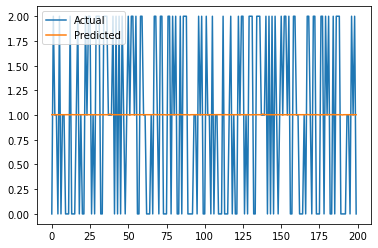

In [218]:
plt.plot(test_y, label='Actual')
plt.plot(y_test_pred.detach().numpy(), label='Predicted')
plt.legend()
plt.show()
